In [1]:
#import all the necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
#access the data from local computer and look at the top data first
dataset = pd.read_csv('D:/Data Analysis/Practices/Datasets/World_H_R.csv')
dataset.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
#understand about the data by showing measures variables and other details
dataset.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [5]:
#justify the value of all variables in the dataset
dataset.count().isnull()

Country                          False
Region                           False
Happiness Rank                   False
Happiness Score                  False
Standard Error                   False
Economy (GDP per Capita)         False
Family                           False
Health (Life Expectancy)         False
Freedom                          False
Trust (Government Corruption)    False
Generosity                       False
Dystopia Residual                False
dtype: bool

In [6]:
#now import the another library to draw the bar plot diagram properly
import seaborn as sns

C:\Users\jobae\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Switzerland'),
 Text(1, 0, 'Iceland'),
 Text(2, 0, 'Denmark'),
 Text(3, 0, 'Norway'),
 Text(4, 0, 'Canada'),
 Text(5, 0, 'Finland'),
 Text(6, 0, 'Netherlands'),
 Text(7, 0, 'Sweden'),
 Text(8, 0, 'New Zealand'),
 Text(9, 0, 'Australia')]

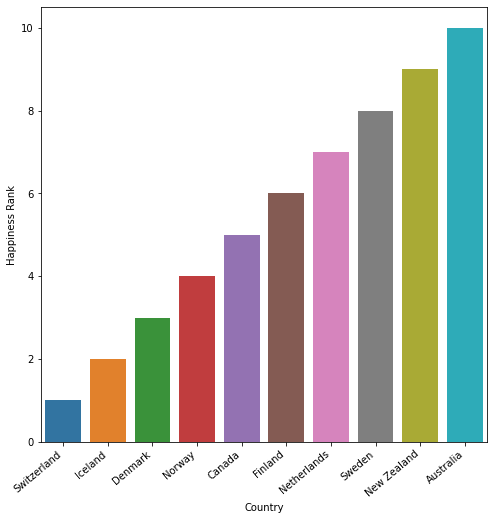

In [7]:
#figure out the top happiest countries in the world from this dataset
plt.figure(figsize=(8,8))
ax = sns.barplot(dataset['Country'].head(10),dataset['Happiness Rank'].head(10))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

In [8]:
#it's time to check the position of Bangladesh in the ranking
dataset[dataset['Country']=='Bangladesh']

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
108,Bangladesh,Southern Asia,109,4.694,0.03077,0.39753,0.43106,0.60164,0.4082,0.12569,0.21222,2.51767


In [9]:
#find the unique regions in the dataset to build a region dataframe
dataset['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [11]:
#devide the countries acording to their region for regional scores meassure
for area in dataset['Region'].unique():
    print(len(dataset[dataset['Region'] == area]), area)

21 Western Europe
2 North America
2 Australia and New Zealand
20 Middle East and Northern Africa
22 Latin America and Caribbean
9 Southeastern Asia
29 Central and Eastern Europe
6 Eastern Asia
40 Sub-Saharan Africa
7 Southern Asia


In [12]:
region_list=[]
for area in dataset['Region'].unique():
    ScoreSum = dataset.loc[dataset['Region'] == area]['Happiness Score'].sum()
    totalCountriesInRegion = len(dataset.loc[dataset['Region'] == area])
    avgHappinessScorePerRegion = ScoreSum/totalCountriesInRegion;
    dictTable = {'Region': area, 'Happiness Score Per Region': avgHappinessScorePerRegion, 'TotalCountriesInRegion': totalCountriesInRegion};
    region_list.append(dictTable)

In [13]:
#all the regions are listed here and separate the regions with their scores
new_df = pd.DataFrame(region_list)
new_df.sort_values(['Happiness Score Per Region'], ascending=False, inplace=True)
new_df

,Region,Happiness Score Per Region,TotalCountriesInRegion
2,Australia and New Zealand,7.285000,2
1,North America,7.273000,2
0,Western Europe,6.689619,21
4,Latin America and Caribbean,6.144682,22
7,Eastern Asia,5.626167,6
3,Middle East and Northern Africa,5.406900,20
6,Central and Eastern Europe,5.332931,29
5,Southeastern Asia,5.317444,9
9,Southern Asia,4.580857,7
8,Sub-Saharan Africa,4.202800,40


C:\Users\jobae\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Australia and New Zealand'),
 Text(1, 0, 'North America'),
 Text(2, 0, 'Western Europe'),
 Text(3, 0, 'Latin America and Caribbean'),
 Text(4, 0, 'Eastern Asia'),
 Text(5, 0, 'Middle East and Northern Africa'),
 Text(6, 0, 'Central and Eastern Europe'),
 Text(7, 0, 'Southeastern Asia'),
 Text(8, 0, 'Southern Asia'),
 Text(9, 0, 'Sub-Saharan Africa')]

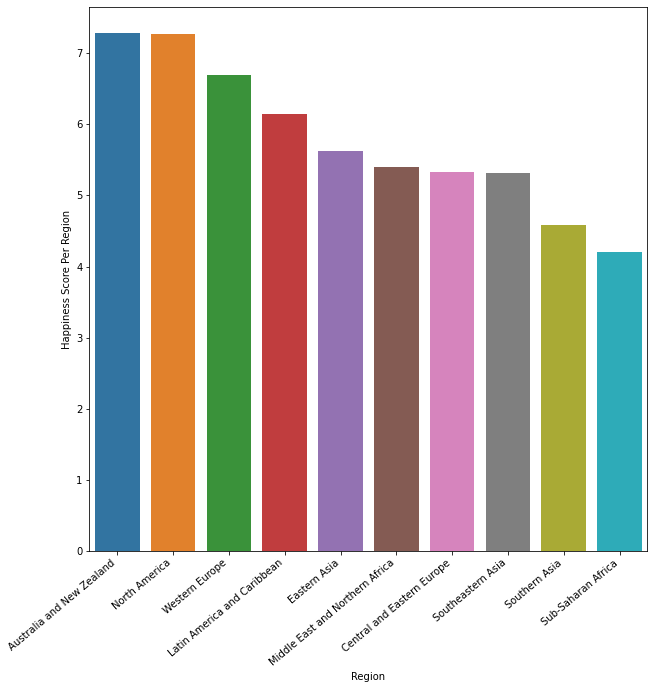

In [14]:
#it's time to figure out the regional scores in the ranking for all unique regions
plt.figure(figsize=(10,10))
ax = sns.barplot(new_df['Region'], new_df['Happiness Score Per Region'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")